In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spint

In [2]:
# Set up the various parameters
Tinf = 200 # deg C
h = 400 # W/m2 K
Tsur = 400 # deg C
Ti = 25 #deg C
D = 0.7 # mm
rho = 8500 # kg/m3
c = 400 # J/kg K
eps = 0.9
sigma = 5.670374419e-8 # W/m2 K4
Tss = 218.728 # deg C

In [3]:
# Convert parameters to proper units
Tinf = Tinf + 273.15 # K
Tsur = Tsur +273.15 # K
Ti = Ti + 273.15 # K
D = D*1e-3 # m
Tss = Tss + 273.15 # K
# Compute other helpful variables
V = np.pi/6 * D**3
As = np.pi*D**2
Tsse = Tss-1.0

In [4]:
# Tempeature derivative RHS
def dTdt(time,T):
    return As/(rho*V*c)*(eps*sigma*(Tsur**4-T**4)-h*(T-Tinf))

In [5]:
# Figure out when steady enough state is reached, ie. When T=Tsse
def steady_enough(time,T):
    return T-Tsse*np.ones_like(T)

[]

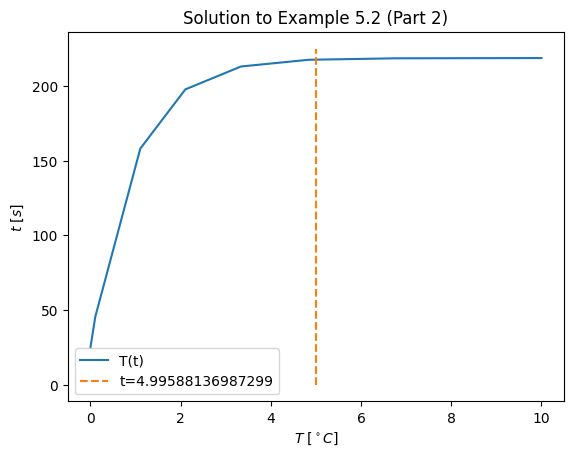

In [6]:
# Solve the temperature as a function of time.
sol = spint.solve_ivp(dTdt,[0,10],[Ti],events=steady_enough)
# Extract the time to reach Tsse
t_sse = sol.t_events[0]
# Plot the solution
plt.figure()
plt.plot(sol.t,sol.y[0]-273.15,label=r'T(t)')
plt.plot([t_sse,t_sse],[0,225],'--',label=r't='+str(t_sse[0]))
plt.title('Solution to Example 5.2 (Part 2)')
plt.xlabel(r'$T\ [^\circ C]$')
plt.ylabel(r'$t\ [s]$')
plt.legend()
plt.plot()
